In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
order_products_train_df = pd.read_csv("order_products__train.csv")
order_products_prior_df = pd.read_csv("order_products__prior.csv")
orders_df = pd.read_csv("orders.csv")
products_df = pd.read_csv("products.csv")
aisles_df = pd.read_csv("aisles.csv")
departments_df = pd.read_csv("departments.csv")

In [3]:
import random
#orders_df =orders_df[ orders_df['user_id']<15000 ]
orders_df = orders_df.sample(frac=0.3)
order_id = orders_df['order_id']
order_products_train = order_products_train_df[order_products_train_df['order_id'].isin(order_id) ]
order_product_prior =  order_products_prior_df[order_products_prior_df['order_id'].isin(order_id) ]



In [5]:
cnt_srs = orders_df.groupby("eval_set")["user_id"].nunique()
cnt_srs


eval_set
prior    186331
test      22729
train     39531
Name: user_id, dtype: int64

In [7]:
orders_df.order_number.mean()

17.154857979183785

We know that we have 21 departments, 134 aisles and 49688 different products.

In [3]:
print(order_products_prior_df.head())

print(order_products_train_df.head())

   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1


order_product_*_df has same columns. Then what is the difference between these files.?

As mentioned, in this dataset, 4 to 100 orders of a customer are given and we need to predict the products that will be re-ordered. So the last order of the user has been taken out and divided into train and test sets. All the prior order informations of the customer are present in order_products_prior file. We can also note that there is a column in orders.csv file called eval_set which tells us as to which of the three datasets (prior, train or test) the given row goes to.

Orders_product*csv file has more detailed information about the products that been bought in the given order along with the re-ordered status.

In [4]:
orders_df.head() 

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


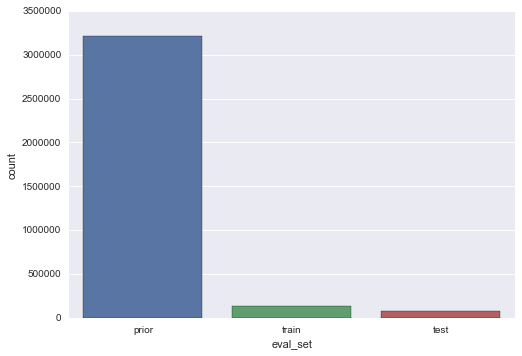

In [5]:
sns.set(style="darkgrid")
sns.countplot( x='eval_set' , data = orders_df , )

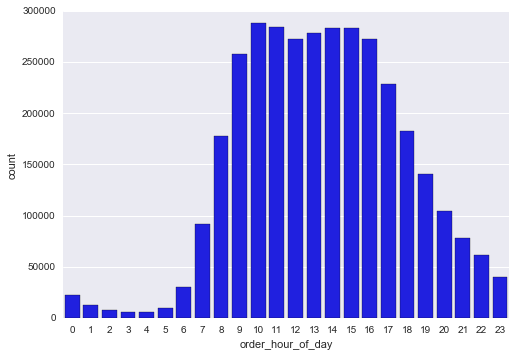

In [6]:
sns.countplot( x='order_hour_of_day' , data = orders_df , color='blue' )

**So majority of the orders are made during day time.**

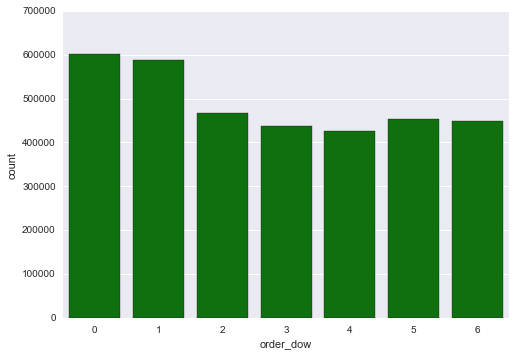

In [7]:
sns.countplot(x='order_dow', data = orders_df , color='green'  )

** So most of the orders are placed on weekends. lowest order on Wednesday. **

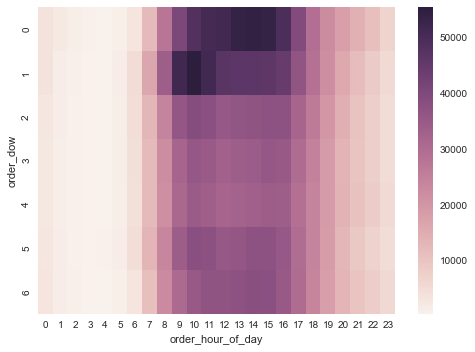

In [8]:
grpby_hour_day=orders_df.groupby(['order_dow','order_hour_of_day'])['order_number'].count().reset_index()
metric_grp_by =grpby_hour_day.pivot('order_dow', 'order_hour_of_day', 'order_number')
sns.heatmap(metric_grp_by)
#sns.heatmap(grpby_hour_day)

In [ ]:
grp_by_orderid = orders_df.groupby([])

So there are more orders places on sat sunday between day time. Spacially during 9AM-4PM !!

In [9]:
cnt_srs = orders_df.groupby("eval_set")["user_id"].nunique()
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

So We have total 206209 number of total customers. Out of which for 131209 cutomers last purchase is given in training set. And we have to predice for 75000 test customers.

**How frequently people order?**

We can see that people order every week after 7 days. There is also small peak at day 14 and 21. 

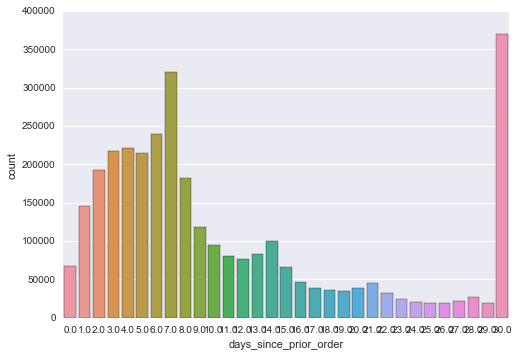

In [10]:
sns.countplot(x = 'days_since_prior_order',data = orders_df)

**Almost 59% of products are re-orders.**

In [11]:
order_products_prior_df['reordered'].sum()/(order_products_prior_df.shape[0] * 1.0)

0.5896974667922161

In [12]:

# percentage of re-orders in train set #
order_products_train_df['reordered'].sum()/(order_products_train_df.shape[0] * 1.0)

0.5985944127509629

Lets dig products department and aisles file

In [13]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [14]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
orders_prod_mr = pd.merge(order_products_prior_df,products_df,on='product_id',how='left')
orders_prod_mr = pd.merge(orders_prod_mr,aisles_df, on= 'aisle_id',how='left')
orders_prod_mr = pd.merge(orders_prod_mr,departments_df, on= 'department_id',how='left')
orders_prod_mr.head()


In [4]:
orders_prod_mr = pd.merge(order_product_prior,products_df,on='product_id',how='left')
orders_prod_mr = pd.merge(orders_prod_mr,aisles_df, on= 'aisle_id',how='left')
orders_prod_mr = pd.merge(orders_prod_mr,departments_df, on= 'department_id',how='left')
orders_prod_mr.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,4,46842,1,0,Plain Pre-Sliced Bagels,93,3,breakfast bakery,bakery
1,4,26434,2,1,Honey/Lemon Cough Drops,11,11,cold flu allergy,personal care
2,4,39758,3,1,Chewy 25% Low Sugar Chocolate Chip Granola,3,19,energy granola bars,snacks
3,4,27761,4,1,Oats & Chocolate Chewy Bars,48,14,breakfast bars pastries,breakfast
4,4,10054,5,1,Kellogg's Nutri-Grain Apple Cinnamon Cereal,48,14,breakfast bars pastries,breakfast


** What are most Frequently baught products?**

Seems like most of the organic and fruits are most frequently baughts items.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

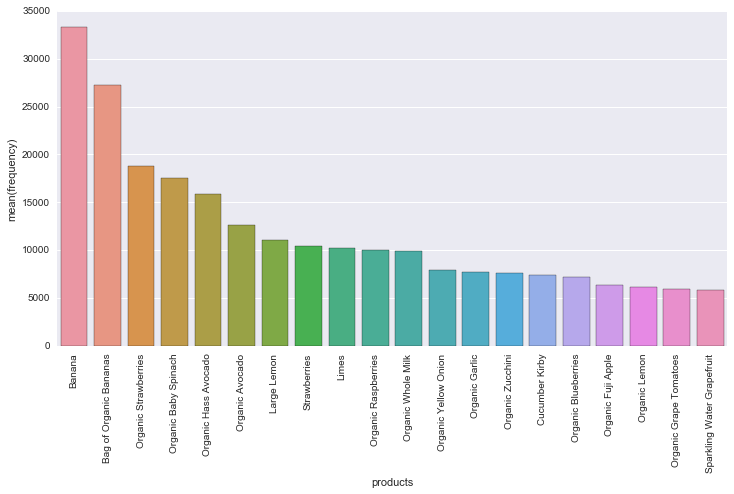

In [25]:
plt.figure(figsize=(12, 6))
cnt_ord_prd = orders_prod_mr["product_name"].value_counts().reset_index().head(20)
cnt_ord_prd.columns = ['products','frequency']
sns.barplot(x='products',y='frequency',data=cnt_ord_prd)
plt.xticks(rotation='vertical')

**What are most reorderd items?**

In [18]:
grp_order_prod= orders_prod_mr.groupby("product_name",sort=True)['reordered'].sum().reset_index()
sns.countplot(grp_order_prod.sort_values("reordered",ascending=False).head(20))

,product_name,reordered
3676,Banana,398609
3471,Bag of Organic Bananas,315913
31920,Organic Strawberries,205845
28840,Organic Baby Spinach,186884
30297,Organic Hass Avocado,170131
28804,Organic Avocado,134044
32478,Organic Whole Milk,114510
22413,Large Lemon,106255
31363,Organic Raspberries,105409
42904,Strawberries,99802


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

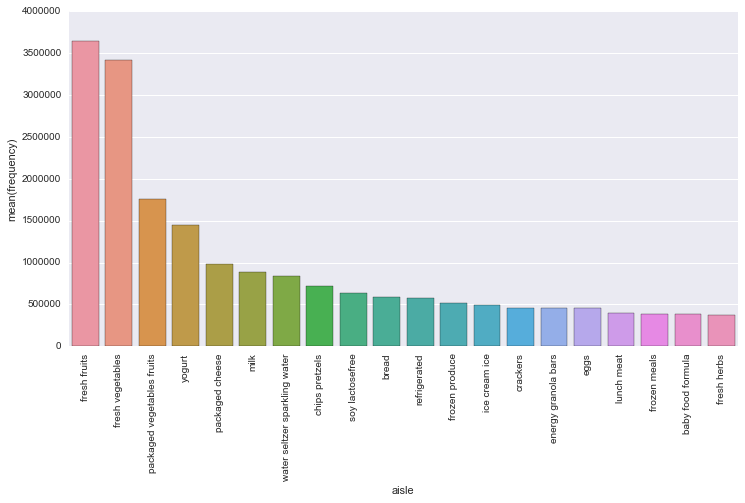

In [31]:
plt.figure(figsize=(12, 6))
cnt_ord_ais = orders_prod_mr["aisle"].value_counts().reset_index().head(20)
cnt_ord_ais.columns = ['aisle','frequency']
sns.barplot(x='aisle',y='frequency',data=cnt_ord_ais)
plt.xticks(rotation='vertical')

**Let find out department distribution **

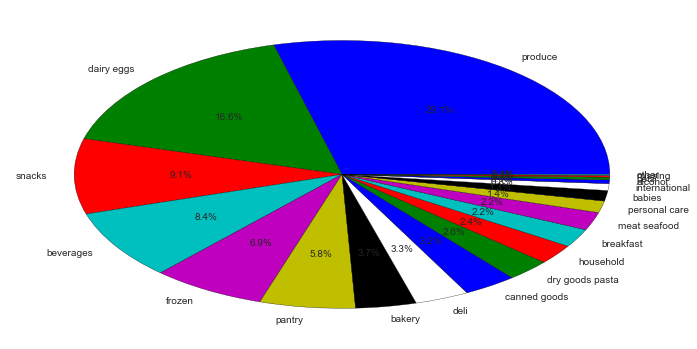

In [32]:
plt.figure(figsize=(12, 6))
cnt_ord_ais = orders_prod_mr["department"].value_counts().reset_index().head(20)
cnt_ord_ais.columns = ['department','frequency']
plt.pie(cnt_ord_ais.frequency, labels=cnt_ord_ais.department,autopct='%1.1f%%',);
#sns.barplot(x='department',y='frequency',data=cnt_ord_ais)
#plt.xticks(rotation='vertical')

**Organic VS Non-Organic**

In [10]:
def organic(prod):
    if 'organic' in  prod.lower():
        return 1
    else:
        return 0

In [23]:
orders_prod_mr['organic'] = orders_prod_mr['product_name'].apply(organic)


**Number of Organic vs Non-Organic products**

Looks like there are more non-organic products than Organic ones.

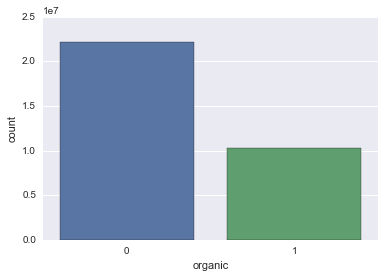

In [12]:
sns.countplot(x='organic',data=orders_prod_mr)

**Number of reordere organic vs non-organice**

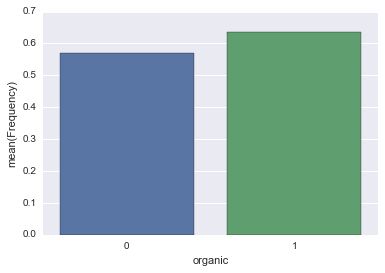

In [29]:
grp_order= orders_prod_mr.groupby("organic")['reordered'].mean().reset_index()
grp_order.columns = ['organic','Frequency']
sns.barplot(x='organic',y='Frequency',data=grp_order)

# Reordered product analysis

**Department wise reorder ratio**

Dairy egg beverages and produce are top three reorder department.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

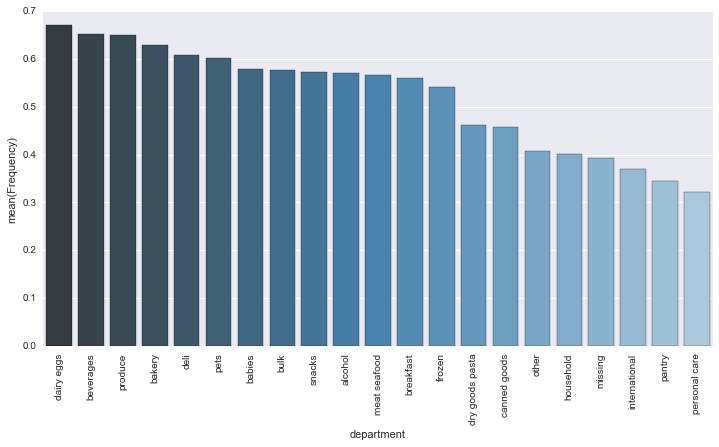

In [24]:
plt.figure(figsize=(12, 6))
grp_order= orders_prod_mr.groupby(["department"])['reordered'].mean().reset_index()
grp_order.columns = ['department','Frequency']
grp_order=grp_order.sort_values(['Frequency'],ascending=False)
sns.barplot(x='department',y='Frequency',data=grp_order, palette="Blues_d")
plt.xticks(rotation='vertical')

**Most visited aisle**

Milk, water, fresh fruits and eggs aisle has most product reordered

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

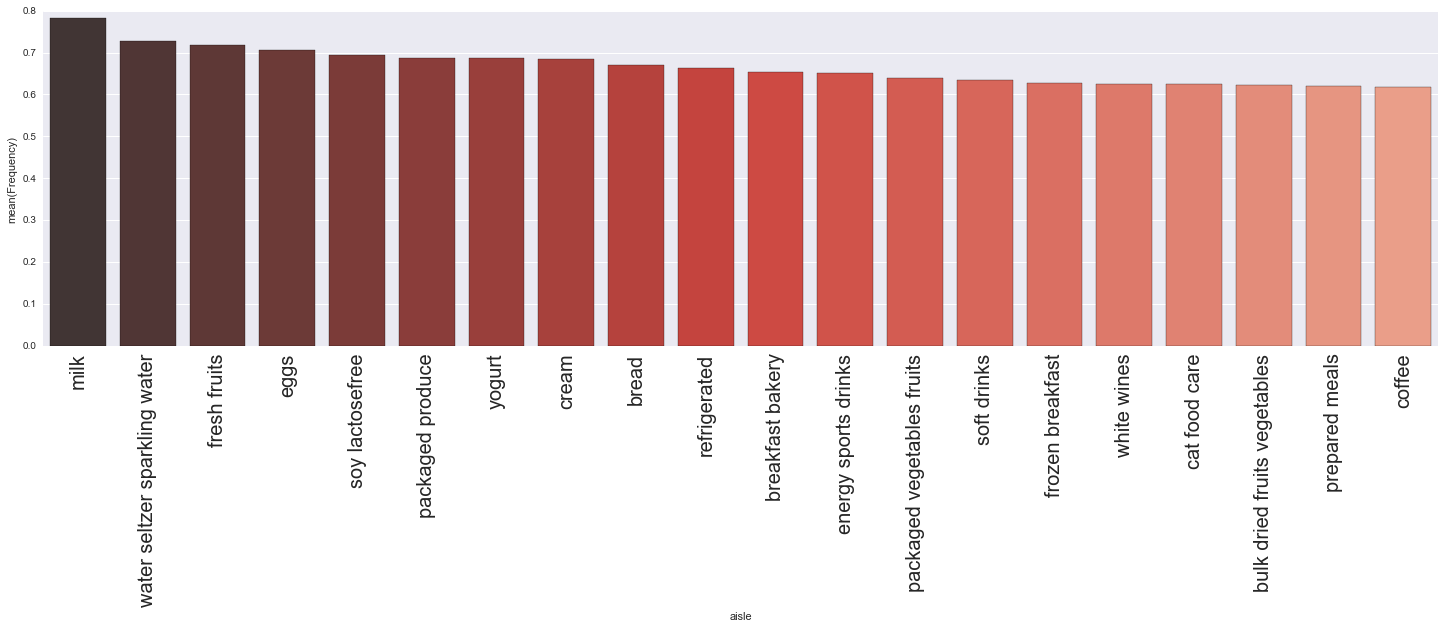

In [46]:
plt.figure(figsize=(25, 6))
grp_order= orders_prod_mr.groupby(["aisle"])['reordered'].mean().reset_index()
grp_order.columns = ['aisle','Frequency']
grp_order=grp_order.sort_values(['Frequency'],ascending=False)
sns.barplot(x='aisle',y='Frequency',data=grp_order.head(20), palette="Reds_d")
plt.xticks(rotation='vertical',fontsize = 20)

**First product to be put in cart**

Banana, organic banana,Organic Milk,are the few products first put in cart while reordering.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

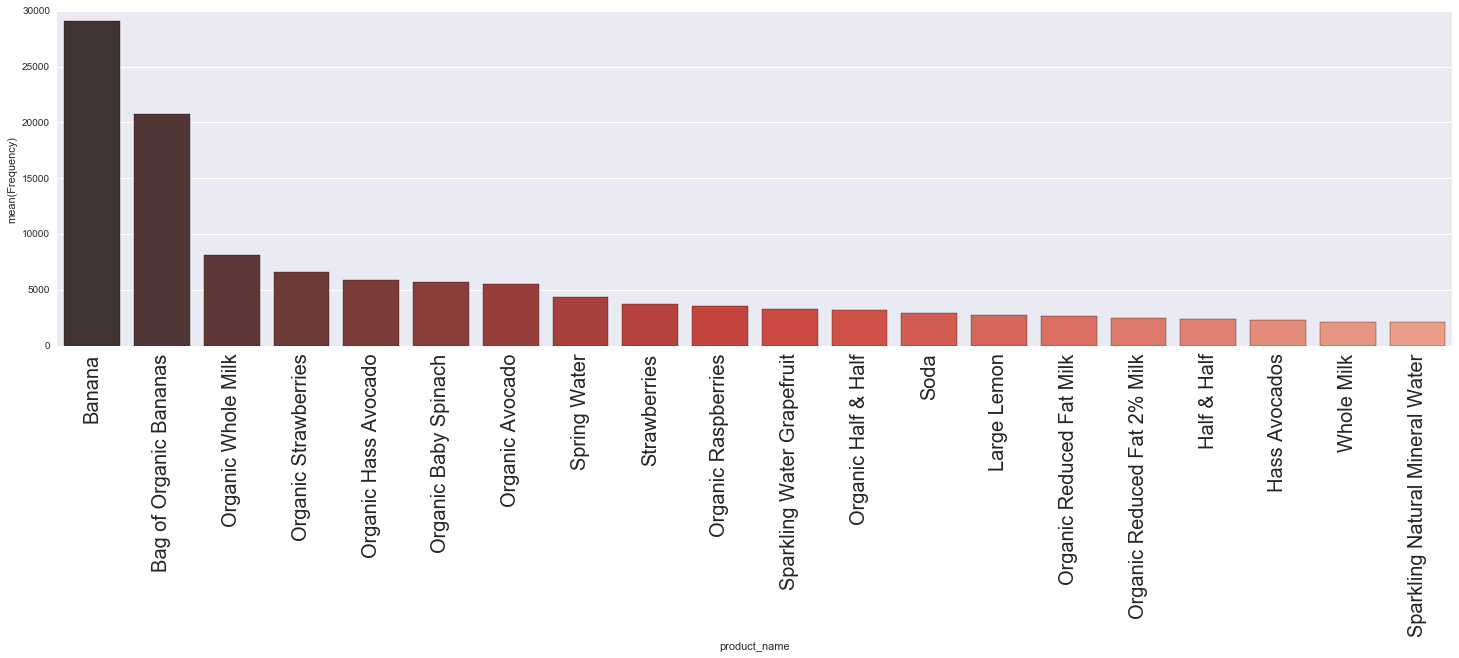

In [48]:
plt.figure(figsize=(25, 6))
grp_order= orders_prod_mr.groupby(["add_to_cart_order",'product_name'])['reordered'].sum().reset_index()
grp_order.columns = ['add_to_cart_order','product_name','Frequency']
grp_order = grp_order[grp_order['add_to_cart_order']==1]
grp_order=grp_order.sort_values(['Frequency'],ascending=False)
#grp_order.head(20).plot.scatter(x='product_name',y='add_to_cart_order',c='Frequency',cmap='coolwarm')
sns.barplot(x='product_name',y='Frequency',data=grp_order.head(20), palette="Reds_d")
plt.xticks(rotation='vertical',fontsize = 20)

**Relation between Add to cart order and Reorder**

Looks like item which are added to cart first are the one reordered most.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120]), <a list of 121 Text xticklabel objects>)

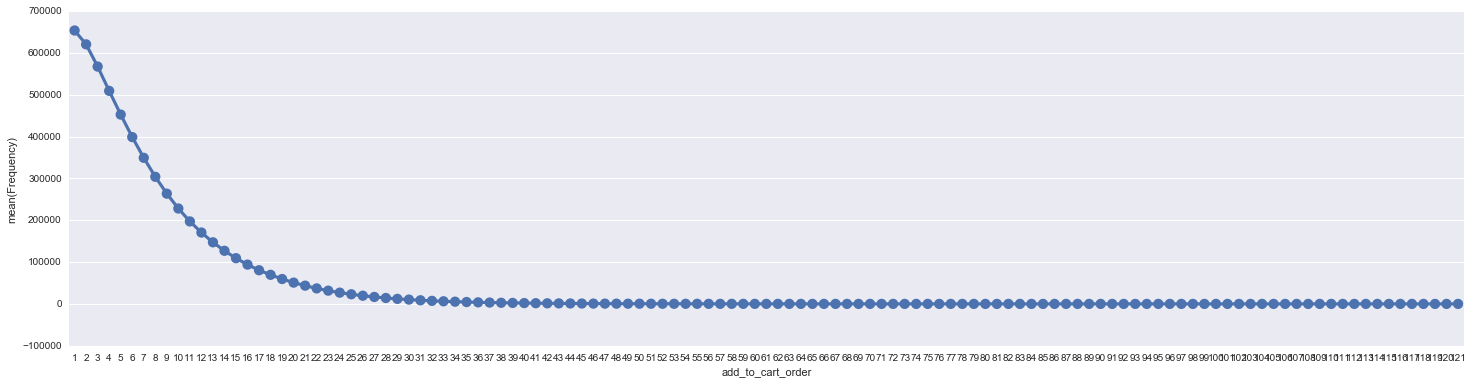

In [7]:
plt.figure(figsize=(25, 6))
grp_order= orders_prod_mr.groupby(["add_to_cart_order"])['reordered'].sum().reset_index()
grp_order.columns = ['add_to_cart_order','Frequency']
grp_order=grp_order.sort_values(['Frequency'],ascending=False)
#grp_order.head(20).plot.scatter(x='product_name',y='add_to_cart_order',c='Frequency',cmap='coolwarm')
sns.pointplot(x='add_to_cart_order',y='Frequency',data=grp_order, alpha=0.8)
plt.xticks(fontsize = 10)

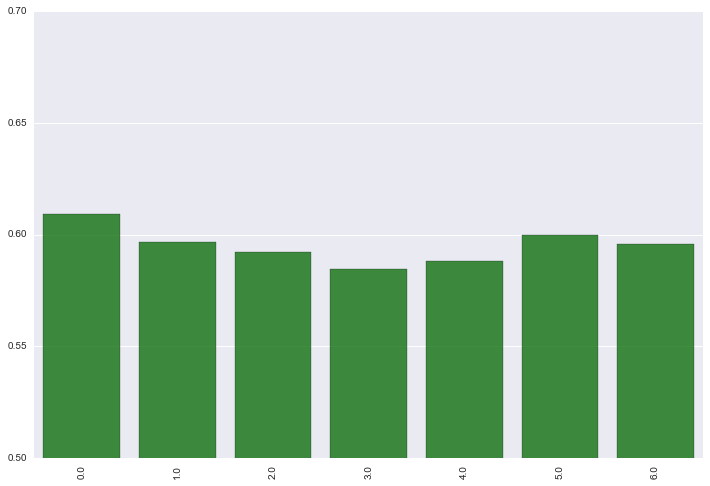

In [17]:
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

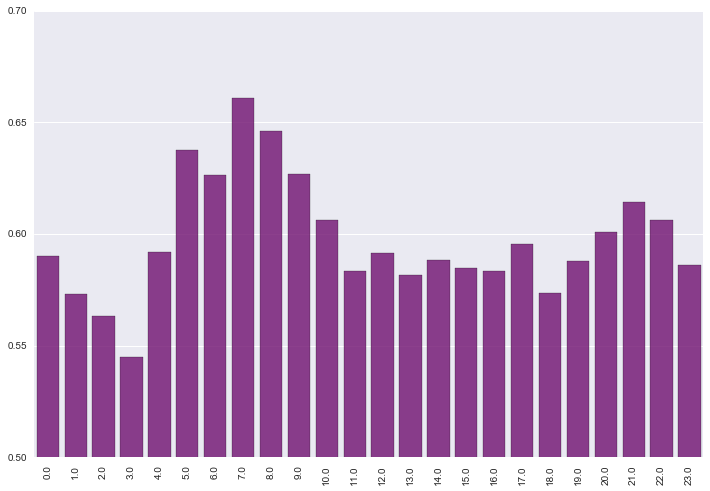

In [18]:
grouped_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8, color='purple')
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

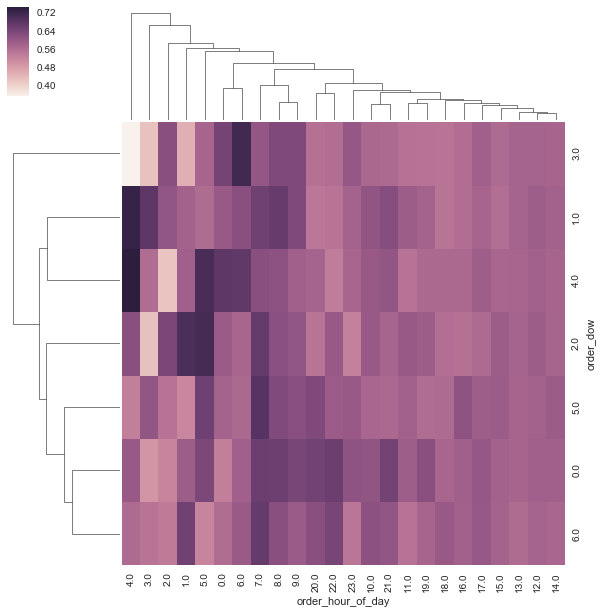

In [28]:
grpby_hour_day=order_products_train_df.groupby(['order_dow','order_hour_of_day'])['reordered'].mean().reset_index()
metric_grp_by =grpby_hour_day.pivot('order_dow', 'order_hour_of_day', 'reordered')
season_colors = (sns.color_palette("BuPu", 3) +
                     sns.color_palette("RdPu", 3) +
                     sns.color_palette("YlGn", 3) +
                      sns.color_palette("OrRd", 3))
sns.clustermap(metric_grp_by,)

Looks like reorder ratios are quite high during the early mornings compared to later half of the day.

